In [2]:
from Landscape import Landscape
from CogLandscape import CogLandscape
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np

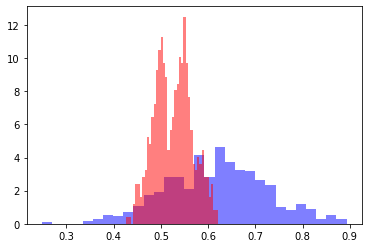

In [5]:
N = 9
K = 1
state_num = 4
landscape = Landscape(N=N, K=K, state_num=state_num)
cog_landscape = CogLandscape(landscape=landscape, expertise_domain=list(range(N)),
                             expertise_representation=["A", "B"], norm=False)
list1 = list(landscape.cache.values())
list2 = list(cog_landscape.cache.values())
# print(len(list1), len(list2))
# Plot histograms
list1 = np.random.choice(list1, size=len(list2))
plt.hist(list1, bins=30, alpha=0.5, label='Landscape', color="blue", density=True)

# Estimate PDF for List 1
# kde1 = gaussian_kde(list1)
# x_values1 = np.linspace(min(list1), max(list1), 40)
# pdf1 = kde1(x_values1)
# plt.plot(x_values1, pdf1, 'r-')

plt.hist(list2, bins=40, alpha=0.5, label='CogLandscape', color="red", density=True)

# Estimate PDF for List 2
# kde2 = gaussian_kde(list2)
# x_values2 = np.linspace(min(list2), max(list2), 40)
# pdf2 = kde2(x_values2)
# plt.plot(x_values2, pdf2, 'g-')

# Add labels and legend
# plt.xlabel('Values')
# plt.ylabel('Density')
# plt.title('Histograms and PDFs of Two Random Number Distributions')
# plt.legend()

# Show the plot
plt.show()

In [11]:
# Sample data for two distributions
data1 = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6]
data2 = [2, 3, 3, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9]

# Estimating the probability density functions (PDFs)
pdf1 = gaussian_kde(data1)
pdf2 = gaussian_kde(data2)

# Creating a common support grid
x = np.linspace(min(min(data1), min(data2)), max(max(data1), max(data2)), num=100)

# Evaluating the PDFs on the common support grid
pdf1_vals = pdf1(x)
pdf2_vals = pdf2(x)

# Calculating the KL divergence
kl_divergence = kl_div(pdf1_vals, pdf2_vals).sum()

print(f"KL Divergence: {kl_divergence}")


KL Divergence: 4.3545587337686475


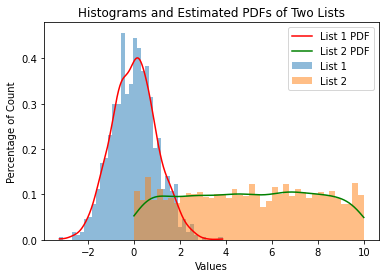

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random numbers
np.random.seed(42)  # To ensure reproducibility

# List 1 (Normal Distribution)
list1 = np.random.normal(loc=0, scale=1, size=1000)

# List 2 (Uniform Distribution)
list2 = np.random.uniform(low=0, high=10, size=2000)

# Plot histograms
plt.hist(list1, bins=40, density=True, alpha=0.5, label='List 1')

# Estimate PDF for List 1
kde1 = gaussian_kde(list1)
x_values1 = np.linspace(list1.min(), list1.max(), 1000)
pdf1 = kde1(x_values1)
plt.plot(x_values1, pdf1, 'r-', label='List 1 PDF')

plt.hist(list2, bins=40, density=True, alpha=0.5, label='List 2')

# Estimate PDF for List 2
kde2 = gaussian_kde(list2)
x_values2 = np.linspace(list2.min(), list2.max(), 1000)
pdf2 = kde2(x_values2)
plt.plot(x_values2, pdf2, 'g-', label='List 2 PDF')

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Percentage of Count')
plt.title('Histograms and Estimated PDFs of Two Lists')
plt.legend()

# Show the plot
plt.show()



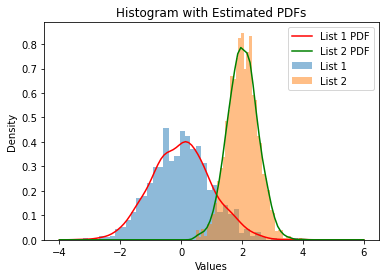

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

np.random.seed(42)

list1 = np.random.normal(loc=0, scale=1, size=1000)
list2 = np.random.normal(loc=2, scale=0.5, size=2000)

# Plot histogram
plt.hist(list1, bins=40, alpha=0.5, label='List 1', density=True)
plt.hist(list2, bins=40, alpha=0.5, label='List 2', density=True)

# Estimate and plot PDF lines
density1 = gaussian_kde(list1)
density2 = gaussian_kde(list2)

x_vals = np.linspace(-4, 6, 100)
plt.plot(x_vals, density1(x_vals), 'r-', label='List 1 PDF')
plt.plot(x_vals, density2(x_vals), 'g-', label='List 2 PDF')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram with Estimated PDFs')
plt.legend()
plt.show()
plt.clf()